# CSCI 2000U - Scientific Data Analysis
## Final Project - Proposal

#### Group Members - Project Group 26
- Yaksh Joshi - 100676861 (CRN-42730)
- Olivia Ramos - 100755912 (CRN-42730)
- Umairuddin Mohammed - 100797124 (CRN-42730)
- Ajaane Kanagasabai - 100785593 (CRN-42730)

## The dataset
**Suicide Rates Overview 1985 to 2016**

*Source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016*

This dataset contains the suicide rates of all the countries from 1985 to 2016.


- country - Country in the world
- year - Year for which data is shown
- sex -Gender description (i.e. male, female)
- age - The cluster of age group
- suicide_no - Number of suicides
- population - Population of the country
- suicides/100k pop - The number of suicides per 100k population
- country-year - country-year composite key
- HDI for year - Human Development Index for that year
- gdp_for_year (\\$) - GDP of the country for that year (USD)
- gdp_per_capita (\\$) - GDP per capita for that country (USD)
- generation - The generation of a particular group



In [1]:
import csv
import re
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('master.csv', 'r',encoding='utf-8-sig') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

#### Code Analysis
The total records in the data

In [2]:
len(data)

27820

### Displaying the top 3 records

In [3]:
list(data)[:3]

[{'country': 'Albania',
  'year': '1987',
  'sex': 'male',
  'age': '15-24 years',
  'suicides_no': '21',
  'population': '312900',
  'suicides/100k pop': '6.71',
  'country-year': 'Albania1987',
  'HDI for year': '',
  ' gdp_for_year ($) ': '2,156,624,900',
  'gdp_per_capita ($)': '796',
  'generation': 'Generation X'},
 {'country': 'Albania',
  'year': '1987',
  'sex': 'male',
  'age': '35-54 years',
  'suicides_no': '16',
  'population': '308000',
  'suicides/100k pop': '5.19',
  'country-year': 'Albania1987',
  'HDI for year': '',
  ' gdp_for_year ($) ': '2,156,624,900',
  'gdp_per_capita ($)': '796',
  'generation': 'Silent'},
 {'country': 'Albania',
  'year': '1987',
  'sex': 'female',
  'age': '15-24 years',
  'suicides_no': '14',
  'population': '289700',
  'suicides/100k pop': '4.83',
  'country-year': 'Albania1987',
  'HDI for year': '',
  ' gdp_for_year ($) ': '2,156,624,900',
  'gdp_per_capita ($)': '796',
  'generation': 'Generation X'}]

### The number of unique countries represented in the dataset

In [4]:
Country = []
for n in data:
    Country.append(n['country'])
    
print("There are total %d unique countries represented in the dataset" % len(set(Country)))

There are total 101 unique countries represented in the dataset


### What is range of the years covered in dataset?

In [5]:
Year = []
for n in data:
    Year.append(n['year'])
    
set(Year)

{'1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016'}

### What are the different sexes covered in the dataset?

In [6]:
Sex = []

for n in data:
    Sex.append(n['sex'])
    
set(Sex)

{'female', 'male'}

### How many age groups are covered in the dataset and which are they?

In [7]:
Age = []

for n in data:
    Age.append(n['age'])
    
print(set(Age))
print("Total %d  age groups" % len(set(Age)))

{'15-24 years', '35-54 years', '25-34 years', '5-14 years', '55-74 years', '75+ years'}
Total 6  age groups


### How many different generations are there and which are they?

In [8]:
Generation = []
for n in data:
    Generation.append(n['generation'])
print(set(Generation))
print("Total %d  generation groups" % len(set(Generation)))

{'Generation X', 'Silent', 'Boomers', 'Millenials', 'Generation Z', 'G.I. Generation'}
Total 6  generation groups


#### Motivation for choosing dataset
As global suicide rates are increasing, we chose a dataset that provides enough data with a wide range of attributes that can demonstrate a correlation between key socio-economic factors (i.e., the status of particular groups) and suicide rates. Since this dataset provides socio-economic background for each nation on the basis of years, we can attribute increased/decreased sucicide rates among different groups within a particular time, generation, country, etc. Therefore, the collection of such data can demonstrate certain indicators of increased suicide rates, which is useful in the cause of suicide prevetion.

#### Interesting Dataset apart from this one
We were also interested in a couple of other datasets, their description is as follows:
1) Earthquakes in Canada - This dataset represents the unique attributes of earthquakes, by analyzing this dataset we can see the pattern of earthquakes geographically in Canada.
2) Unemployment rates of population aged 15 and over, total and with Indigenous identity, by educational attainment, Canada - This dataset shows the crucial details of the unemployment rates among total population with Indigenous identity with respect to eductional attainment in Canada.

#### Data Analysis Questions
1) Which generation and age range experiences the most significant suicide rates? 
2) Which sex predomiantly makes up the global suicide rate?
3) Which countries display the lowest, highest, and average suicide rates? What socio-economic factors can you attrirbute to this?
4) What can the suicide rate vs. year range indicate globally, and within a particular country?
5) Does the GDP have a negative or positive correlation with suicide rates?
6) Does the GDP per capita have a negative or positive correlation with suicide rates?
7) Are the suicide rates highest among countries with the greatest population, or does there exist a country with a higher suicide rate but smaller population?
8) Provide explanation of the variance between countries and their suicide rates.

#### Potential Data Science Applications

1) Regressive analysis can demonstate the relationship between unique independent variables (population, GDP, etc.) and the dependent variable (number of suicides). How x and y interact can provide insight into trends pertaining to the increase/decrease of the number of suicides.
2) Visual models can be used to highlight the differences between variables; bringing attention to certain socio-economic factors which should be considered in the prevention of suicide. Visual models include bar graphs, world maps, pie charts, etc.
3) Time-series model can be used to predict future trends pertaining to the growth, decrease, or levelling of suicide rates.
4) A clustering model, which combines certain attributes can be used to determine its relation of multiple independent varibles to the dependent variable (increased suicide risks). 

/tmp/ipykernel_1358/2372571719.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


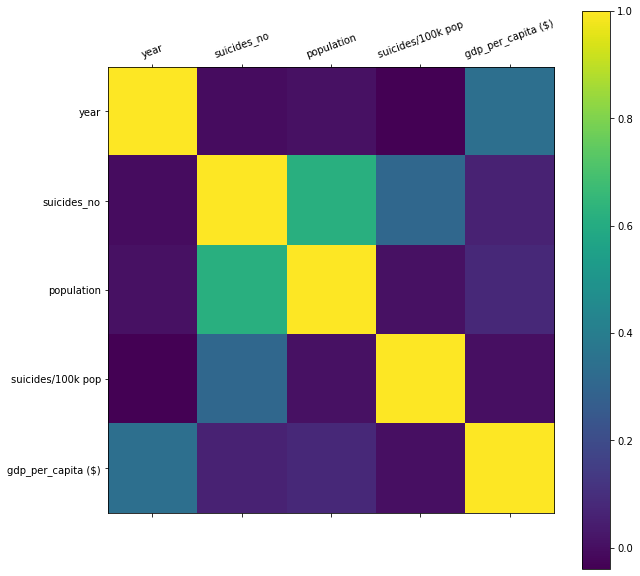

In [9]:
df = pd.read_csv('master.csv')

#function to plot correlation matrix 
def plot_matrix(df, size):
    df = df.dropna('columns')
    c_plot = df.corr()
    plt.figure(figsize = (size, size))
    c_mat = plt.matshow(c_plot, fignum = 1)
    plt.xticks(range(len(c_plot.columns)), c_plot.columns, rotation=20)
    plt.yticks(range(len(c_plot.columns)), c_plot.columns)
    plt.colorbar(c_mat)
    plt.show()
plot_matrix(df, 10)

From the correlation matrix, we can see that there is a weak correlation between most the of variables in regards to 'suicides_no' (number of suicides) and 'suicides/100k pop' (suicides per 100k of the population). The exception to this is when comparing these variables to population. As expected, a greater population will yield a higher suicide rates. In addition, there seems to be a slight positive increase in the correlation between these two variables (suicide rates) and the GDP per capita. Does an increase in GDP mean higher suicide rates?

In [10]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [11]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


First, let's analyze the distribution of generation:

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Generation')]

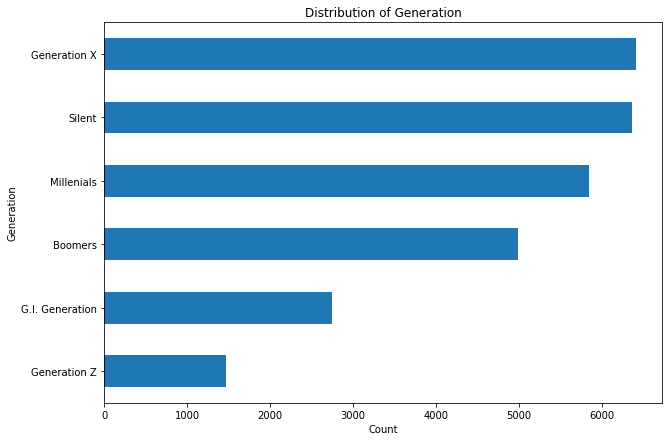

In [13]:
gen_count = df['generation'].value_counts(ascending=True)
gen_count.plot.barh(title='Distribution of Generation', figsize=(10, 7)).set(xlabel='Count', ylabel='Generation')

From the distribution chart above, we can see that Generation X makes up the majority of the count; closely followed by the Silent Generation. Generation Z displays the lowest distribution. Let's determine the the top 10 years for suicides by generation:

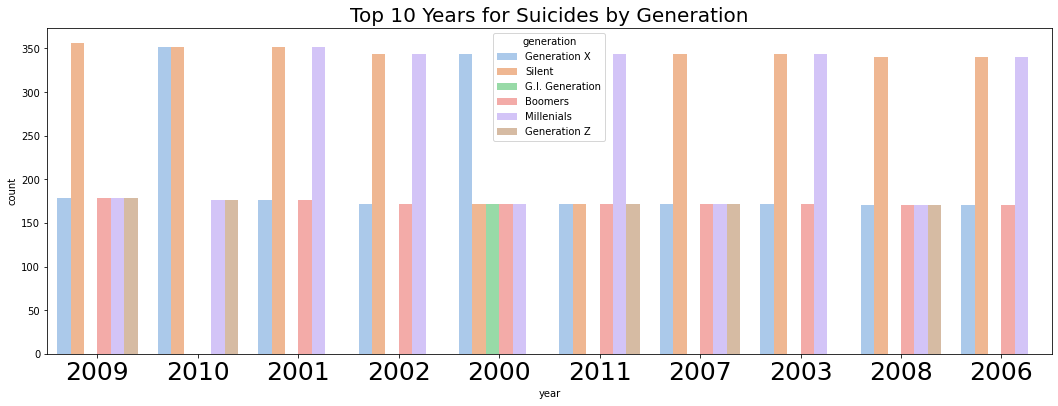

In [18]:
top_years_gen = df['year'].value_counts().nlargest(10).index
plt.figure(figsize=(18, 6))
sns.countplot(x="year", data=df, order=top_years_gen, palette='pastel', hue='generation')
plt.xticks(size=25, rotation=0)
plt.title("Top 10 Years for Suicides by Generation",fontsize=20)
plt.show()


Throughout the 2000s, the Silent generation, Gen X, and Millenials follow the trend of their distribution. The top year for suicides by generation is 2009. Now, observing the number (sum) of suicides per year:

,year,suicides_no
27,2012,230160
28,2013,223199
29,2014,222984
30,2015,203640
31,2016,15603


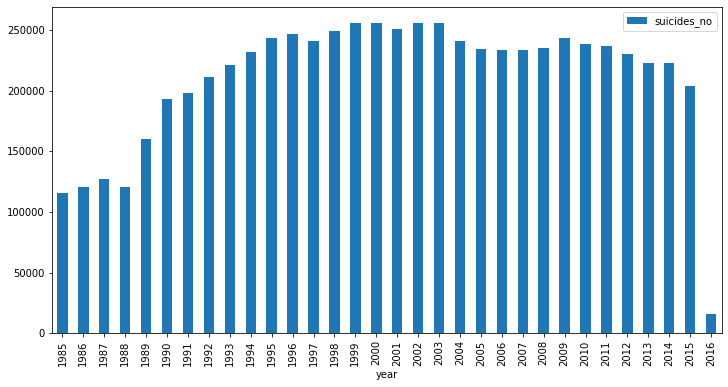

In [36]:
year_suicide = df.groupby('year')['suicides_no'].sum().reset_index()
year_suicide.plot(kind='bar', figsize=(12,6), x='year')
year_suicide.tail(5)

From the chart, we can see that the total number of suicides increases from 1985 onward. The sum peaks in 1998-2003, declines slightly, then drops drastically after 2015. 

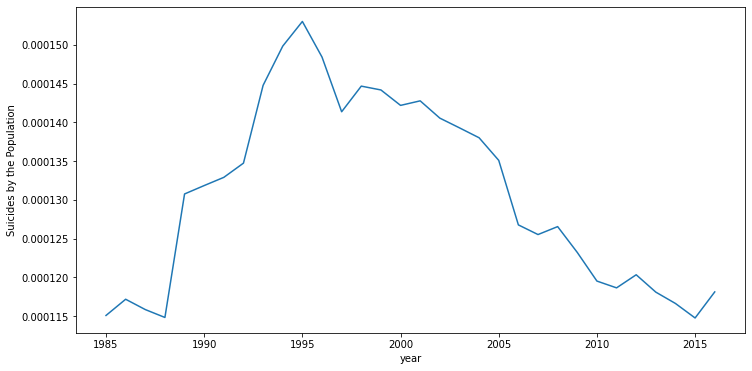

In [37]:
plt.figure(figsize=(12,6))
year_suicide_pop = df.groupby(['year']).agg({'suicides_no':'mean', 'population':'mean'}).sort_values(by=['suicides_no']).reset_index()
year_suicide_pop['Suicides by the Population'] = year_suicide_pop['suicides_no'] / year_suicide_pop['population']
sns.lineplot(x=year_suicide_pop['year'], y=year_suicide_pop['Suicides by the Population']);

If we compare the number (sum) of suicides per year vs the averages of suicides by population per year, we can clearly see a drastic increase in the suicide/population rate after 1990, where it peaks around 1995. Before we determine this cause, let's consider which sex makes up the sum of suicides throughout the years:

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


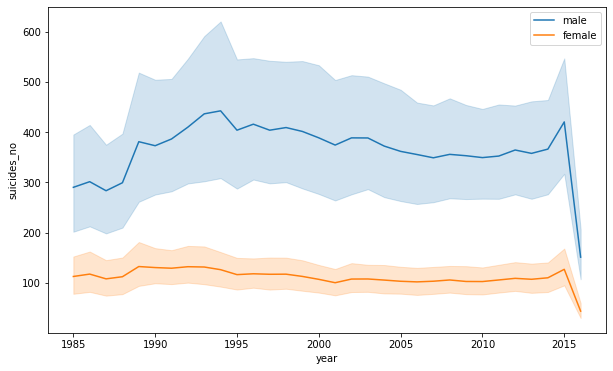

In [38]:
plt.figure(figsize=(10,6))
male = df[df['sex'] == 'male']
female = df[df['sex'] == 'female']
sns.lineplot(male['year'], df['suicides_no'])
sns.lineplot(female['year'], df['suicides_no'])
plt.legend(['male', 'female'])
plt.show()

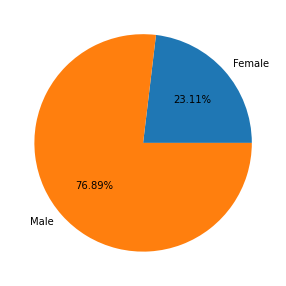

In [31]:
plt.figure(figsize=(5,5))
sex = df.groupby('sex')['suicides_no'].sum()
plt.pie(sex, autopct='%2.2f%%', labels=['Female', 'Male']);


Throughout the range of years, males make up the majority of the suicide rates of nearly 77%. Both males and females follow the trend, with rates increasing/decreasing throughout varying years. 

Now, given the weak correlation between suicide rates and GPD per capita, let's observe what the averages of suicide/population demonstrate by country:

In [45]:
country_avg = df.groupby(['country','sex']).agg({'gdp_per_capita ($)':'mean', 'suicides_no':'mean', 'population':'mean'}).sort_values(by=['suicides_no'], ascending=False).reset_index()
country_avg['Suicides by the Population'] = country_avg['suicides_no'] / country_avg['population']
country_avg = country_avg.sort_values(by=['Suicides by the Population'], ascending=False)
country_avg['Suicides by the Population'].mean()
country_avg.head(15)

,country,sex,gdp_per_capita ($),suicides_no,population,Suicides by the Population
42,Lithuania,male,9280.549618,175.786260,2.402566e+05,0.000732
0,Russian Federation,male,6518.814815,6144.518519,1.055612e+07,0.000582
23,Belarus,male,3333.904762,395.952381,7.280138e+05,0.000544
64,Latvia,male,8961.095238,81.714286,1.627728e+05,0.000502
25,Hungary,male,9370.051613,359.845161,7.608708e+05,0.000473
12,Sri Lanka,male,904.272727,637.015152,1.379687e+06,0.000462
14,Kazakhstan,male,5329.115385,534.525641,1.161898e+06,0.000460
90,Estonia,male,11376.095238,44.769841,9.939199e+04,0.000450
3,Ukraine,male,1867.535714,1539.125000,3.521422e+06,0.000437
74,Slovenia,male,18642.238095,65.976190,1.564161e+05,0.000422


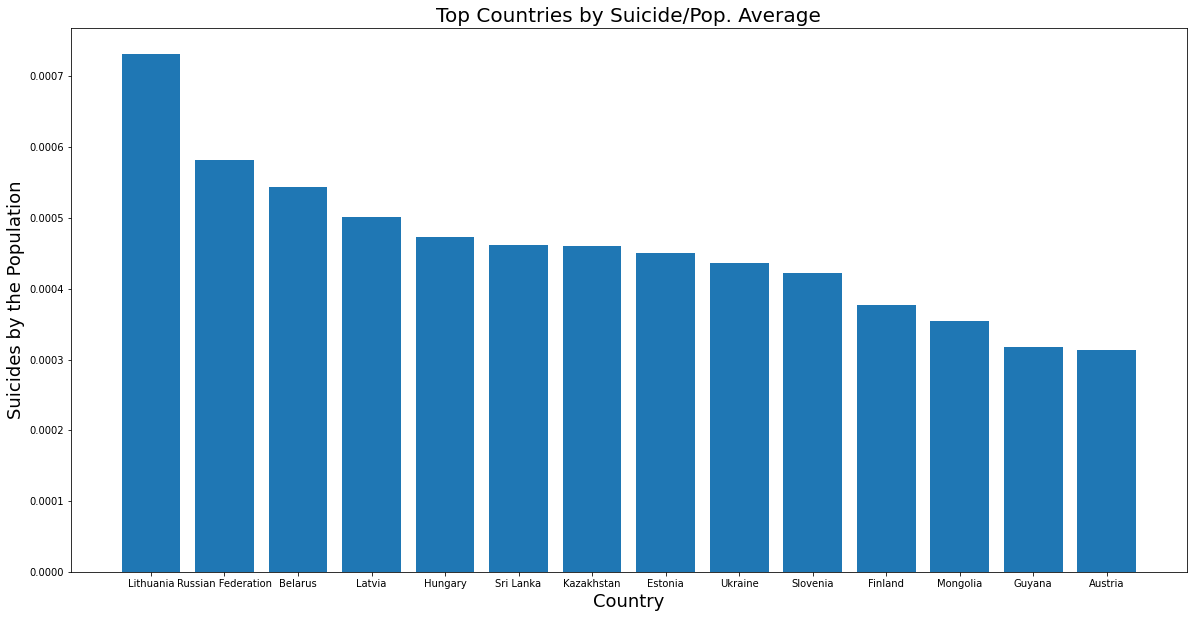

In [61]:
plt.figure(figsize=(20,10))
plt.bar(country_avg['country'].head(14), country_avg['Suicides by the Population'].head(14));
plt.title("Top Countries by Suicide/Pop. Average", fontsize=20)
plt.ylabel("Suicides by the Population", fontsize=18)
plt.xlabel("Country", fontsize=18);

If we observe the figures displaying the average of suicides by population per year vs the suicide/population average by country, we can relate the significant increase in suicide rates after 1990, where it peeks in 1995, to the effects of the dissolution of the Soviet Union in 1991. Hence, many of the top countries displayed above are countries that formed from the fall of the Soviet Union (Burke, 2014).

Works Cited:
https://www.theguardian.com/world/2014/jun/09/-sp-profiles-post-soviet-states